# Data Science z Python 3.10. CNN w Tensorflow i aplikacja w Flask
## 🇬🇧 Data Science with Python 3.10. CNN in Tensorflow and Flask app
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://www.oronowicz-jaśkowiak.pl/studenci/pjatk

In [1]:
import ssl
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization
# Based on PhD Yash Modi work

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape' , x_train.shape)

170498071/170498071 [==============================] - 25s 0us/step
x_train shape (50000, 32, 32, 3)


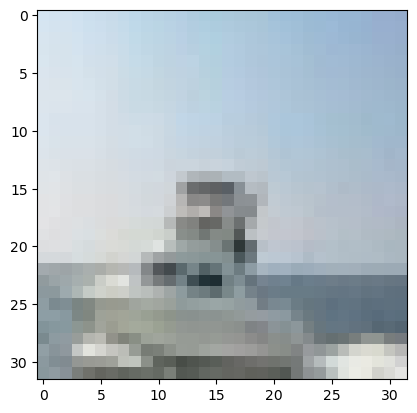

In [4]:
plt.imshow(x_train[100])

In [5]:
datagen = ImageDataGenerator(
                            rotation_range=20,
                            zca_whitening=True,
)
# Ten etap to augmentacja danych
# Polega ona na zastosowaniu w losowy sposób pewnych przekształceń
# https://stepup.ai/exploring_data_augmentation_keras/

/Users/adamjedrzejewski/opt/anaconda3/envs/suml5/lib/python3.10/site-packages/keras/preprocessing/image.py:1446: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [6]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.2, random_state = 0)
# Tu pojawia się nowość
# Możemy mieć zbiór testowy, treningowy i walidacyjny

In [7]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x
# Podzielenie obrazu przez 255 przeskaluje obraz z 0-255 na 0-1
# Konwersja na float z int

x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)
# Korzystamy z powyższej funkcji dla wszystkich naszych zbiorów

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [8]:
def results(model):
  epoch = 1
  r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch, steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val), verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("Strata walidacji na zbiorze walidacyjnym: " , acc[0])
  print("Dokładność klasyfikacji na zbiorze walidacyjnym:", acc[1]*100)
  epoch_range = range(1, epoch+1)

In [9]:
weight_decay = 1e-3
# Dobre wyjaśnienie czym jest weight_decay - https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab
# W skrócie - nasze dane są zwykle bardzo złożone, nie możemy dodać wszystkich wag do funkcji straty, musimy pomnożyć sumę kwadratów przez małą liczbę

In [10]:
model = Sequential()
num_classes = y_test.shape[1]
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.8)

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))
# Dodajemy poszczególne warstwy do naszej sieci neuronowej

/Users/adamjedrzejewski/opt/anaconda3/envs/suml5/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
print(model.summary())
# Możemy zobaczyć jak wygląda schemat naszego modelu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [12]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
results(model)
# W tym miejscu prowadzimy trening

2022-11-06 18:42:51.119425: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - 5s 19ms/step - loss: 2.3146 - accuracy: 0.1028
Strata walidacji na zbiorze walidacyjnym:  2.314603567123413
Dokładność klasyfikacji na zbiorze walidacyjnym: 10.27500033378601


In [14]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')

ModuleNotFoundError: No module named 'google.colab'

In [15]:
model.save("model.hdf5")